In [2]:
import numpy as np

def read_bci_data():
    S4b_train = np.load('S4b_train.npz')
    X11b_train = np.load('X11b_train.npz')
    S4b_test = np.load('S4b_test.npz')
    X11b_test = np.load('X11b_test.npz')

    train_data = np.concatenate((S4b_train['signal'], X11b_train['signal']), axis=0)
    train_label = np.concatenate((S4b_train['label'], X11b_train['label']), axis=0)
    test_data = np.concatenate((S4b_test['signal'], X11b_test['signal']), axis=0)
    test_label = np.concatenate((S4b_test['label'], X11b_test['label']), axis=0)

    train_label = train_label - 1
    test_label = test_label -1
    train_data = np.transpose(np.expand_dims(train_data, axis=1), (0, 1, 3, 2))
    test_data = np.transpose(np.expand_dims(test_data, axis=1), (0, 1, 3, 2))

    mask = np.where(np.isnan(train_data))
    train_data[mask] = np.nanmean(train_data)

    mask = np.where(np.isnan(test_data))
    test_data[mask] = np.nanmean(test_data)

    print(train_data.shape, train_label.shape, test_data.shape, test_label.shape)

    return train_data, train_label, test_data, test_label


In [3]:
train_data, train_label, test_data, test_label = read_bci_data()

(1080, 1, 2, 750) (1080,) (1080, 1, 2, 750) (1080,)


In [7]:
from sklearn import preprocessing
train_data = train_data.reshape(-1, 1*2*750)
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
train_data = train_data.reshape(-1, 1, 2, 750)

Label: 1.0


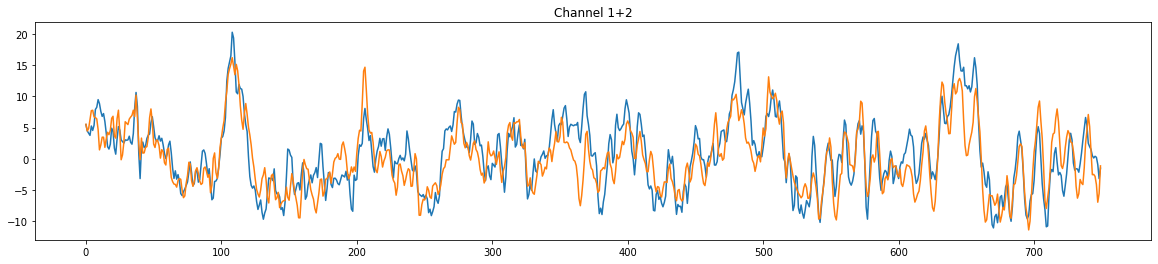

In [4]:
import matplotlib.pyplot as plt
print("Label:", train_label[0])
plt.figure(figsize=(20, 4))
x_axis = np.arange(0, 750)
plt.plot(x_axis, train_data[0][0][0])
plt.title("Channel 1")
# plt.show()

# plt.figure(figsize=(20, 4))
# x_axis = np.arange(0, 750)
plt.plot(x_axis, train_data[0][0][1])
plt.title("Channel 1+2")
plt.show()

0.0


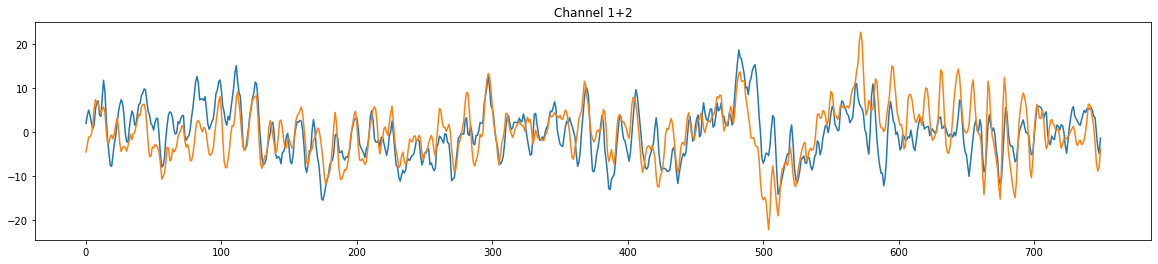

In [5]:
print(train_label[2])

plt.figure(figsize=(20, 4))
x_axis = np.arange(0, 750)
plt.plot(x_axis, train_data[2][0][0])
# plt.title("Channel 1")
# plt.show()

# plt.figure(figsize=(20, 4))
# x_axis = np.arange(0, 750)
plt.plot(x_axis, train_data[2][0][1])
plt.title("Channel 1+2")
plt.show()